# ISO Spectra

There are ISO spectra in the Galactic center.   Let's plot them.

In [4]:
import requests
from bs4 import BeautifulSoup

In [7]:
resp = requests.get('https://irsa.ipac.caltech.edu/workspace/TMP_ttHAMi_24908/Atlas/17h_45m_37.22s_-28d_56m_10.2s_Equ_J2000_26633.v0001/sws_pws_spsc.tbl.html')
resp.raise_for_status()
soup = BeautifulSoup(resp.text)
fitsfiles = [x.attrs['href'] for x in soup.findAll('a') if x.attrs['href'].endswith('fit')]

['https://irsa.ipac.caltech.edu:443/data/SWS/spectra/sws/09401801_sws.fit',
 'https://irsa.ipac.caltech.edu:443/data/SWS/spectra/pws/09401801_pws.fit',
 'https://irsa.ipac.caltech.edu:443/data/SWS/spectra/sws/09401905_sws.fit',
 'https://irsa.ipac.caltech.edu:443/data/SWS/spectra/pws/09401905_pws.fit',
 'https://irsa.ipac.caltech.edu:443/data/SWS/spectra/sws/09500203_sws.fit',
 'https://irsa.ipac.caltech.edu:443/data/SWS/spectra/pws/09500203_pws.fit',
 'https://irsa.ipac.caltech.edu:443/data/SWS/spectra/sws/13600935_sws.fit',
 'https://irsa.ipac.caltech.edu:443/data/SWS/spectra/pws/13600935_pws.fit',
 'https://irsa.ipac.caltech.edu:443/data/SWS/spectra/sws/28701246_sws.fit',
 'https://irsa.ipac.caltech.edu:443/data/SWS/spectra/pws/28701246_pws.fit',
 'https://irsa.ipac.caltech.edu:443/data/SWS/spectra/sws/28702002_sws.fit',
 'https://irsa.ipac.caltech.edu:443/data/SWS/spectra/pws/28702002_pws.fit',
 'https://irsa.ipac.caltech.edu:443/data/SWS/spectra/sws/29702147_sws.fit',
 'https://ir

In [8]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [9]:
for fn in fitsfiles:
    resp = requests.get(fn)
    resp.raise_for_status()
    basefn = os.path.basename(fn)
    with open(f'{basepath}/{basefn}', 'wb') as fh:
        fh.write(resp.content)

In [10]:
import pyspeckit

In [18]:
from astropy.io import fits
from astropy import units as u

In [19]:
def read_iso(fn):
    fh = fits.open(fn)
    wl = fh[0].data[:,0] * u.um
    flux = fh[0].data[:,1] * u.Jy
    return pyspeckit.Spectrum(xarr=wl, data=flux, header=fh[0].header)

(0.0, 8.0)

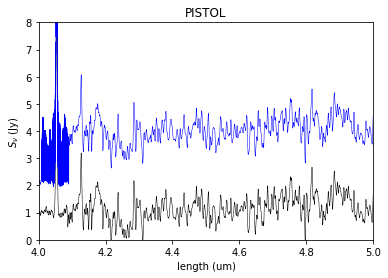

In [28]:
sps = read_iso(f'{basepath}/84101302_sws.fit')
spp = read_iso(f'{basepath}/84101302_pws.fit')
sps.plotter(xmin=4, xmax=5.0)
spp.plotter(xmin=4, xmax=5.0, axis=sps.plotter.axis, color='b', clear=False)
spp.plotter.axis.set_ylim(0, 8)

(0.0, 12.0)

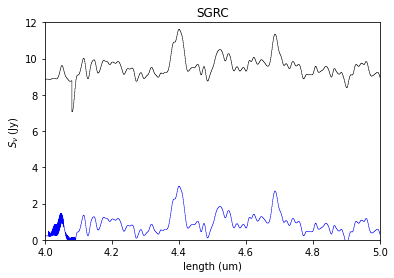

In [30]:
sps = read_iso(f'{basepath}/84100301_sws.fit')
spp = read_iso(f'{basepath}/84100301_pws.fit')
sps.plotter(xmin=4, xmax=5.0)
spp.plotter(xmin=4, xmax=5.0, axis=sps.plotter.axis, color='b', clear=False)
spp.plotter.axis.set_ylim(0, 12)

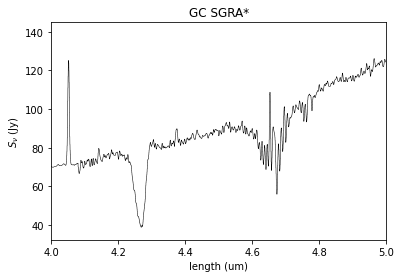

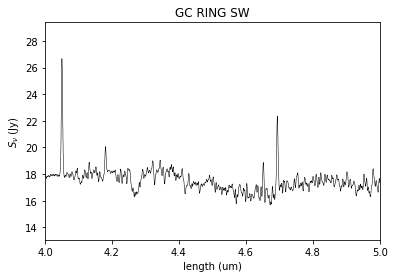

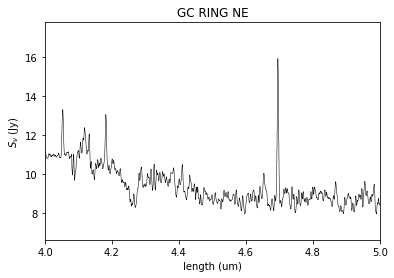

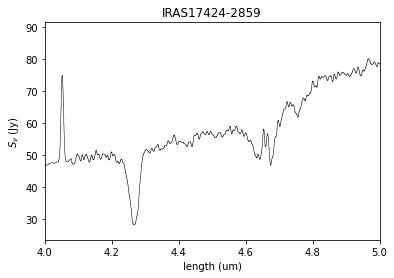

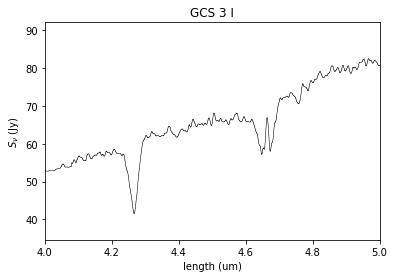

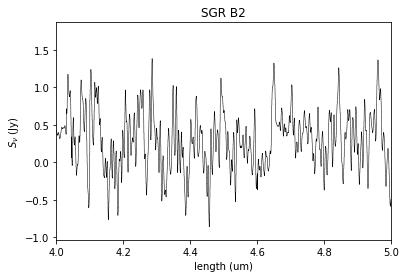

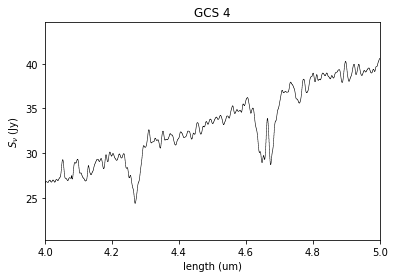

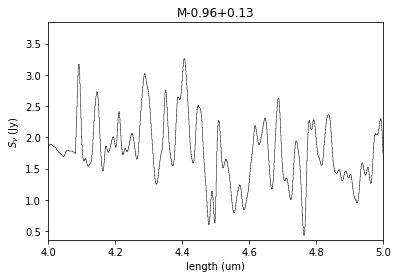

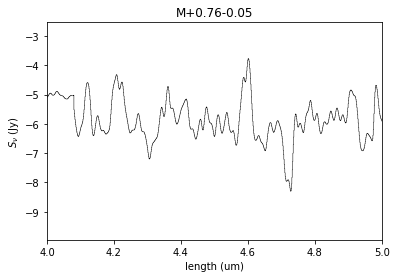

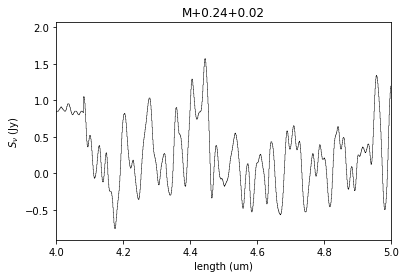

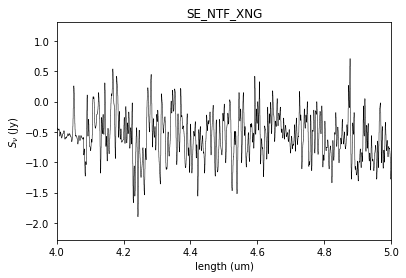

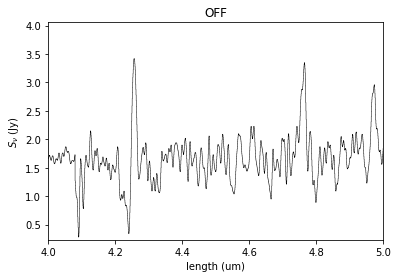

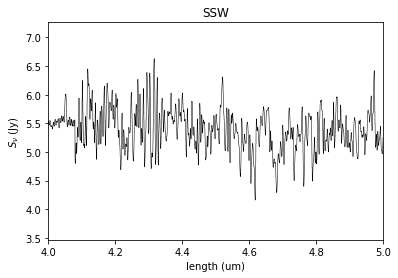

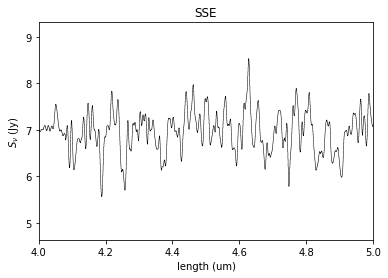

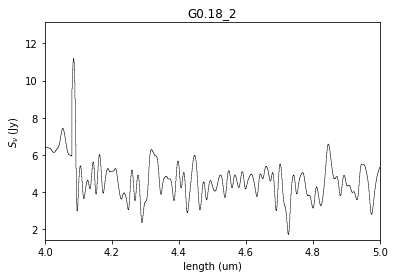

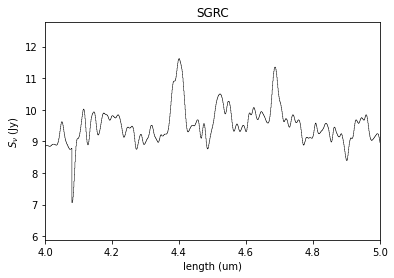

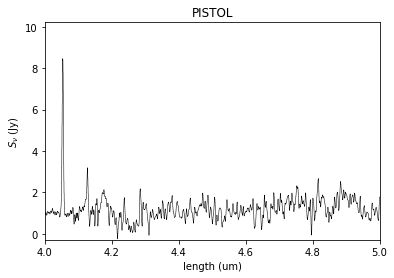

In [32]:
for fn in fitsfiles:
    basefn = os.path.basename(fn)
    if 'sws' in basefn:
        sp = read_iso(f'{basepath}/{basefn}')
        sp.plotter(xmin=4, xmax=5)